In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
import pandas as pd
df = pd.read_excel('LNG (High).xlsx')

In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Explore the data (e.g., check for missing values, summary statistics)
print(df.head())  # Display the first few rows

        Date  Price
0 2024-06-01  2.799
1 2024-05-01  2.924
2 2024-04-01  2.092
3 2024-03-01  2.009
4 2024-02-01  2.177


In [5]:
df = df.sort_values(by="Date", ascending=True)

print(df)
#print items

          Date  Price
148 2012-02-01  2.733
147 2012-03-01  2.597
146 2012-04-01  2.320
145 2012-05-01  2.759
144 2012-06-01  2.946
..         ...    ...
4   2024-02-01  2.177
3   2024-03-01  2.009
2   2024-04-01  2.092
1   2024-05-01  2.924
0   2024-06-01  2.799

[149 rows x 2 columns]


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
# Prepare data for training
# Reshape data to fit LSTM input requirements (samples, timesteps, features)
X = np.arange(len(df)).reshape(-1, 1, 1)
y = df['Price'].values

# Split data into train and validation sets
train_size = int(0.8 * len(df))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))  # Adjust units as needed
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
4/4 [==============================] - 2s 94ms/step - loss: 13.2808 - val_loss: 34.7768
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 9.5102 - val_loss: 22.1230
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 6.5911 - val_loss: 13.9763
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 4.8236 - val_loss: 9.7302
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 4.0081 - val_loss: 8.6152
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 3.8394 - val_loss: 9.2265
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 3.9075 - val_loss: 9.6988
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 3.8233 - val_loss: 9.3199
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 3.5736 - val_loss: 8.8329
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 3.3369 - val_loss: 8.5881
Epoch 11/50
4/4 [========

In [10]:
# Reshape data to fit LSTM input requirements (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_val = X_val.reshape(X_val.shape[0], 1, 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))  # Adjust units as needed
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
4/4 [==============================] - 2s 104ms/step - loss: 16.9614 - val_loss: 39.7143
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 14.7700 - val_loss: 35.1106
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 12.8744 - val_loss: 31.2304
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 11.2652 - val_loss: 27.6787
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 9.8089 - val_loss: 24.2908
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 8.3865 - val_loss: 20.9429
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 6.9913 - val_loss: 17.5422
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 5.6616 - val_loss: 14.2446
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 4.3604 - val_loss: 11.4079
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 3.3594 - val_loss: 9.4136
Epoch 11/50
4/4

In [11]:
# Generate predictions
X_future = np.arange(len(df), len(df) + 12)  # Predict next 12 months (adjust as needed)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input
y_pred = model.predict(X_future)

# Print predicted prices
print("Predicted prices for the next 12 months:")
for month, price in zip(range(1, 13), y_pred.flatten()):
    print(f"Month {month}: {price:.3f}")

1/1 [==============================] - 0s 288ms/step
Predicted prices for the next 12 months:
Month 1: 4.804
Month 2: 4.836
Month 3: 4.869
Month 4: 4.901
Month 5: 4.933
Month 6: 4.965
Month 7: 4.998
Month 8: 5.030
Month 9: 5.062
Month 10: 5.095
Month 11: 5.127
Month 12: 5.159


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Generate future indices for prediction
X_future = np.arange(len(df), len(df) + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred = model.predict(X_future)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


2/2 [==============================] - 0s 8ms/step
Predicted prices from 2024-04-01 to 2028-12-01:
2024-04-01: 4.804
2024-05-01: 4.836
2024-06-01: 4.869
2024-07-01: 4.901
2024-08-01: 4.933
2024-09-01: 4.965
2024-10-01: 4.998
2024-11-01: 5.030
2024-12-01: 5.062
2025-01-01: 5.095
2025-02-01: 5.127
2025-03-01: 5.159
2025-04-01: 5.192
2025-05-01: 5.224
2025-06-01: 5.256
2025-07-01: 5.289
2025-08-01: 5.321
2025-09-01: 5.353
2025-10-01: 5.386
2025-11-01: 5.418
2025-12-01: 5.450
2026-01-01: 5.483
2026-02-01: 5.515
2026-03-01: 5.548
2026-04-01: 5.580
2026-05-01: 5.612
2026-06-01: 5.645
2026-07-01: 5.677
2026-08-01: 5.709
2026-09-01: 5.742
2026-10-01: 5.774
2026-11-01: 5.806
2026-12-01: 5.839
2027-01-01: 5.871
2027-02-01: 5.903
2027-03-01: 5.936
2027-04-01: 5.968
2027-05-01: 6.000
2027-06-01: 6.033
2027-07-01: 6.065
2027-08-01: 6.097
2027-09-01: 6.130
2027-10-01: 6.162
2027-11-01: 6.194
2027-12-01: 6.226
2028-01-01: 6.259
2028-02-01: 6.291
2028-03-01: 6.323
2028-04-01: 6.355
2028-05-01: 6.388
2

In [13]:
import numpy as np
import pandas as pd
from datetime import datetime

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Generate future indices for prediction
X_future = np.arange(len(df), len(df) + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Ensure data is sorted by date
df = df.sort_values(by="Date", ascending=True)

# Prepare data for LSTM model
X_train = np.arange(len(df)).reshape(-1, 1, 1)
y_train = df['Price'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate predictions
y_pred = model.predict(X_future)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")



Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 14.8051
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 10.9893
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 8.3550
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 6.5110
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 5.5214
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 5.1881
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 5.0828
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 5.0084
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 4.8220
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 4.5802
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 4.3092
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 4.1055
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 

In [14]:
import numpy as np
import pandas as pd
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df = df.sort_values(by="Date", ascending=True)

# Prepare data for training
X_train = np.arange(len(df)).reshape(-1, 1, 1)
y_train = df['Price'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(len(df), len(df) + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred = model.predict(X_future)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 21.9984
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 16.5317
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 12.5768
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 9.9406
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 8.0287
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 6.3747
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 5.1541
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 4.2116
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 3.6614
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 3.6378
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 3.6199
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 3.4585
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss:

In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Prepare data for training
X_train = np.arange(len(df)).reshape(-1, 1, 1)
y_train = df['Price'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(len(df), len(df) + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred = model.predict(X_future)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")



Epoch 1/50
5/5 [==============================] - 2s 4ms/step - loss: 38.4875
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 28.0121
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 19.8465
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 13.8931
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 9.5662
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 6.5871
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 5.1256
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 4.7066
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 4.7825
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 4.4506
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 4.0313
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 3.7607
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Prepare data for training
X_train = np.arange(len(df)).reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(len(df), len(df) + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/50
5/5 [==============================] - 2s 4ms/step - loss: 0.3233
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2001
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0392
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 0.

2/2 [==============================] - 0s 5ms/step
Predicted prices from 2024-04-01 to 2028-12-01:
2024-04-01: 4.501
2024-05-01: 4.532
2024-06-01: 4.563
2024-07-01: 4.594
2024-08-01: 4.625
2024-09-01: 4.657
2024-10-01: 4.688
2024-11-01: 4.720
2024-12-01: 4.752
2025-01-01: 4.784
2025-02-01: 4.816
2025-03-01: 4.848
2025-04-01: 4.881
2025-05-01: 4.913
2025-06-01: 4.946
2025-07-01: 4.979
2025-08-01: 5.013
2025-09-01: 5.046
2025-10-01: 5.079
2025-11-01: 5.113
2025-12-01: 5.147
2026-01-01: 5.181
2026-02-01: 5.215
2026-03-01: 5.249
2026-04-01: 5.284
2026-05-01: 5.318
2026-06-01: 5.353
2026-07-01: 5.388
2026-08-01: 5.423
2026-09-01: 5.458
2026-10-01: 5.493
2026-11-01: 5.529
2026-12-01: 5.565
2027-01-01: 5.600
2027-02-01: 5.636
2027-03-01: 5.673
2027-04-01: 5.709
2027-05-01: 5.745
2027-06-01: 5.782
2027-07-01: 5.818
2027-08-01: 5.855
2027-09-01: 5.892
2027-10-01: 5.929
2027-11-01: 5.967
2027-12-01: 6.004
2028-01-01: 6.041
2028-02-01: 6.079
2028-03-01: 6.117
2028-04-01: 6.155
2028-05-01: 6.193
2

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 10.6493
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 2.6476
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2669
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.7751
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.7956
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2765
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1283
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1302
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0442
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0528
Epoch 13/50
5/5 [==============================] - 0s 5ms/step - loss: 0

2/2 [==============================] - 0s 8ms/step
Predicted prices from 2024-04-01 to 2028-12-01:
2024-04-01: 3.195
2024-05-01: 3.350
2024-06-01: 3.452
2024-07-01: 3.506
2024-08-01: 3.518
2024-09-01: 3.495
2024-10-01: 3.443
2024-11-01: 3.368
2024-12-01: 3.274
2025-01-01: 3.166
2025-02-01: 3.049
2025-03-01: 2.925
2025-04-01: 2.797
2025-05-01: 2.668
2025-06-01: 2.539
2025-07-01: 2.412
2025-08-01: 2.288
2025-09-01: 2.167
2025-10-01: 2.051
2025-11-01: 1.939
2025-12-01: 1.833
2026-01-01: 1.731
2026-02-01: 1.635
2026-03-01: 1.543
2026-04-01: 1.457
2026-05-01: 1.375
2026-06-01: 1.298
2026-07-01: 1.226
2026-08-01: 1.158
2026-09-01: 1.094
2026-10-01: 1.034
2026-11-01: 0.978
2026-12-01: 0.926
2027-01-01: 0.876
2027-02-01: 0.830
2027-03-01: 0.787
2027-04-01: 0.747
2027-05-01: 0.709
2027-06-01: 0.674
2027-07-01: 0.641
2027-08-01: 0.610
2027-09-01: 0.581
2027-10-01: 0.553
2027-11-01: 0.528
2027-12-01: 0.504
2028-01-01: 0.481
2028-02-01: 0.460
2028-03-01: 0.439
2028-04-01: 0.420
2028-05-01: 0.402
2

In [18]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.activations import relu

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1, activation=relu))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/50
5/5 [==============================] - 3s 5ms/step - loss: 4.2243
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 1.7881
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4565
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0926
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0896
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0896
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0896
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 0.

In [19]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.activations import relu

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation=relu))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 0.0895
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0895
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0894
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0816
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0319
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0255
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0252
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 13/100
5/5 [==============================] - 0s 6ms/st

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 4s 11ms/step - loss: 0.0555
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0386
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0266
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0219
Epoch 6/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0176
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0174
Epoch 8/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0183
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0159
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0196
Epoch 11/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0233
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0161
Epoch 13/200
19/19 [=====

In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 7s 12ms/step - loss: 0.0896
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 5/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 6/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 7/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 8/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 9/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 11/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 13/200
19/19 [=====

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = []
prev_pred = y_train[-1]  # Initialize previous prediction with the last known value
for i in range(num_months):
    next_pred = model.predict(prev_pred.reshape(1, 1, 1))
    y_pred_normalized.append(next_pred.flatten())
    prev_pred = next_pred

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/100
19/19 [==============================] - 4s 5ms/step - loss: 0.1041
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0896
Epoch 11/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0896
Epoch 12/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0896
Epoch 13/100
19/19 [=================

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Prepare data for training
X_train = df['Price_normalized'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values.reshape(-1, 1)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Generate future indices for prediction
num_months = 68  # Number of months from April 2024 to December 2028
X_future = np.arange(0, num_months).reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Generate date range for the predictions
dates = pd.date_range(start='2024-04-01', periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/100
149/149 [==============================] - 3s 3ms/step - loss: 0.0527
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 5/100
149/149 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 6/100
149/149 [==============================] - 0s 3ms/step - loss: 9.6837e-04
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 1.6960e-04
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 6.1650e-05
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 5.5161e-05
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 5.8319e-05
Epoch 11/100
149/149 [==============================] - 0s 2ms/step - loss: 5.1718e-05
Epoch 12/100
149/149 [==============================] - 0s 2ms/step - lo

In [24]:
# prompt: Please generate LSTM model here for this "LNG(High).xlsx" file and give accurate output. Forecast values from 2024-04-01 to 2028-12-01

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")



Epoch 1/50
5/5 [==============================] - 2s 4ms/step - loss: 16.9055
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 7.2171
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 2.8354
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9964
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2137
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2934
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 0.2246
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1295
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0899
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 0

In [26]:
# prompt: Predicted prices from 2024-04-01 to 2028-12-01:
# 2024-04-01: 3.351
# 2024-05-01: 3.701
# 2024-06-01: 4.041
# 2024-07-01: 4.372
# 2024-08-01: 4.693
# 2024-09-01: 5.006
# 2024-10-01: 5.312
# 2024-11-01: 5.611
# 2024-12-01: 5.906
# 2025-01-01: 6.196
# These outputs are incorrect prediction here. The values will be 2.67 in June 2024 and at last not so high. Train your model accordingly and give very accurate output

import pandas as pd
import numpy as np
# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/100
5/5 [==============================] - 3s 4ms/step - loss: 1.5013
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1078
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3035
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2133
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0580
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0777
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0445
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0388
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0336
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

In [27]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Introduce some randomness or noise to the predictions
noise_factor = 0.05  # Adjust the noise factor as needed
y_pred_normalized_noisy = y_pred_normalized * np.random.uniform(1 - noise_factor, 1 + noise_factor, size=y_pred_normalized.shape)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized_noisy)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 6s 11ms/step - loss: 0.0896
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 5/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 6/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 11/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0896
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 13/200
19/19 [=====

In [28]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Define maximum allowed change between consecutive predictions
max_change = 0.1  # Adjust as needed

# Clip predictions to ensure maximum allowed change
y_pred_normalized = np.clip(y_pred_normalized, y_pred_normalized - max_change, y_pred_normalized + max_change)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 7s 12ms/step - loss: 0.0576
Epoch 2/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0409
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0312
Epoch 4/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0211
Epoch 6/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0231
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0245
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 11/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0183
Epoch 12/200
19/19 [==============================] - 0s 16ms/step - loss: 0.0178
Epoch 13/200
19/19 [=====

In [29]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))  # Add dropout layer
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Add dropout layer
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 6s 19ms/step - loss: 0.0633
Epoch 2/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0452
Epoch 3/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0374
Epoch 4/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0282
Epoch 5/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0248
Epoch 6/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0247
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0231
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0250
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 11/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0188
Epoch 12/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0198
Epoch 13/200
19/19 [=====

In [30]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 8s 11ms/step - loss: 0.0631
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0519
Epoch 3/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0417
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0374
Epoch 5/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0359
Epoch 6/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0326
Epoch 7/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0293
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0316
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 10/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0319
Epoch 11/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0293
Epoch 12/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 13/200
19/19 [=====

In [31]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, price in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.3f}")


Epoch 1/200
19/19 [==============================] - 8s 12ms/step - loss: 0.0723
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0606
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0450
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0400
Epoch 5/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0344
Epoch 6/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0361
Epoch 7/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0354
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0294
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0325
Epoch 10/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0308
Epoch 11/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0318
Epoch 13/200
19/19 [=====

In [32]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Add random noise to introduce variability
noise = np.random.normal(0, 0.05, y_pred.shape)  # Adjust the scale of the noise as needed
y_pred += noise

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred in zip(dates, y_pred.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f}")


Epoch 1/200
19/19 [==============================] - 9s 22ms/step - loss: 0.0780
Epoch 2/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0599
Epoch 3/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0482
Epoch 4/200
19/19 [==============================] - 0s 17ms/step - loss: 0.0456
Epoch 5/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0411
Epoch 6/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0404
Epoch 7/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0397
Epoch 8/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0377
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0368
Epoch 10/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0345
Epoch 11/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0355
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0347
Epoch 13/200
19/19 [=====

In [33]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = std_dev * 1.28  # 1.28 is the z-score for 80% confidence interval
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates and confidence intervals
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 9s 12ms/step - loss: 0.0715
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0492
Epoch 3/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0425
Epoch 4/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0408
Epoch 5/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0371
Epoch 6/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0376
Epoch 7/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0390
Epoch 8/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 9/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0360
Epoch 10/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0369
Epoch 11/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 12/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0352
Epoch 13/200
19/19 [=====

In [34]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 1.28  # Z-score for 80% confidence level
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates and confidence intervals
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 7s 22ms/step - loss: 0.0732
Epoch 2/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0511
Epoch 3/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0456
Epoch 4/200
19/19 [==============================] - 1s 32ms/step - loss: 0.0388
Epoch 5/200
19/19 [==============================] - 0s 26ms/step - loss: 0.0372
Epoch 6/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0337
Epoch 7/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0333
Epoch 8/200
19/19 [==============================] - 0s 26ms/step - loss: 0.0310
Epoch 9/200
19/19 [==============================] - 1s 29ms/step - loss: 0.0323
Epoch 10/200
19/19 [==============================] - 1s 26ms/step - loss: 0.0315
Epoch 11/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0309
Epoch 12/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0294
Epoch 13/200
19/19 [=====

In [35]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 1.645  # Z-score for 80% confidence level (corresponds to wider interval)
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates and confidence intervals
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 7s 21ms/step - loss: 0.0744
Epoch 2/200
19/19 [==============================] - 0s 24ms/step - loss: 0.0505
Epoch 3/200
19/19 [==============================] - 0s 24ms/step - loss: 0.0430
Epoch 4/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0408
Epoch 5/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0371
Epoch 6/200
19/19 [==============================] - 1s 30ms/step - loss: 0.0365
Epoch 7/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0367
Epoch 8/200
19/19 [==============================] - 1s 31ms/step - loss: 0.0366
Epoch 9/200
19/19 [==============================] - 1s 27ms/step - loss: 0.0297
Epoch 10/200
19/19 [==============================] - 0s 26ms/step - loss: 0.0254
Epoch 11/200
19/19 [==============================] - 1s 28ms/step - loss: 0.0271
Epoch 12/200
19/19 [==============================] - 0s 25ms/step - loss: 0.0307
Epoch 13/200
19/19 [=====

In [37]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 4.25  # Adjusted z-score for wider interval
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates and confidence intervals
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 8s 23ms/step - loss: 0.0755
Epoch 2/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0540
Epoch 3/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0454
Epoch 4/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0441
Epoch 5/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0399
Epoch 6/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0376
Epoch 7/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0349
Epoch 8/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0350
Epoch 9/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0293
Epoch 10/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0306
Epoch 11/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0319
Epoch 12/200
19/19 [==============================] - 0s 11ms/step - loss: 0.0275
Epoch 13/200
19/19 [=====

In [38]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Define a range of z-scores to try
z_scores = [1.96, 2.25, 2.5, 3.0, 3.5, 4.0]

# Print predicted prices with corresponding dates and confidence intervals for each z-score
for z_score in z_scores:
    std_dev = np.std(y_pred_normalized)  # Compute standard deviation
    margin_of_error = z_score * std_dev  # Margin of error
    lower_bound = y_pred - margin_of_error
    upper_bound = y_pred + margin_of_error

    # Generate date range for the predictions
    dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

    # Print results
    print(f"\nFor z-score = {z_score}:")
    for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
        print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 9s 22ms/step - loss: 0.0703
Epoch 2/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0537
Epoch 3/200
19/19 [==============================] - 0s 25ms/step - loss: 0.0451
Epoch 4/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0404
Epoch 5/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0395
Epoch 6/200
19/19 [==============================] - 0s 24ms/step - loss: 0.0361
Epoch 7/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0350
Epoch 8/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0324
Epoch 9/200
19/19 [==============================] - 1s 30ms/step - loss: 0.0310
Epoch 10/200
19/19 [==============================] - 1s 29ms/step - loss: 0.0305
Epoch 11/200
19/19 [==============================] - 0s 25ms/step - loss: 0.0286
Epoch 12/200
19/19 [==============================] - 0s 25ms/step - loss: 0.0293
Epoch 13/200
19/19 [=====

In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 1.645  # Z-score for 80% confidence level (corresponds to wider interval)
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Print predicted prices with corresponding dates and confidence intervals
print("Predicted prices from 2024-04-01 to 2028-12-01:")
for date, pred, lower, upper in zip(dates, y_pred.flatten(), lower_bound.flatten(), upper_bound.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.3f} (Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f})")


Epoch 1/200
19/19 [==============================] - 7s 21ms/step - loss: 0.0639
Epoch 2/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0536
Epoch 3/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0426
Epoch 4/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0399
Epoch 5/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0385
Epoch 6/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0367
Epoch 7/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0311
Epoch 8/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0341
Epoch 9/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0267
Epoch 10/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0336
Epoch 11/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0306
Epoch 12/200
19/19 [==============================] - 0s 24ms/step - loss: 0.0303
Epoch 13/200
19/19 [=====

In [40]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 1.96  # Adjusted z-score for desired confidence level
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Date': dates,
    'Forecasted Price': y_pred.flatten(),
    'Lower Bound': lower_bound.flatten(),
    'Upper Bound': upper_bound.flatten()
})

# Save the predictions to an Excel file
predictions_df.to_excel('Predictions.xlsx', index=False)


Epoch 1/200
19/19 [==============================] - 8s 19ms/step - loss: 0.0794
Epoch 2/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0536
Epoch 3/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0458
Epoch 4/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0411
Epoch 5/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0401
Epoch 6/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0348
Epoch 7/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0360
Epoch 8/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0325
Epoch 9/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0288
Epoch 10/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0335
Epoch 11/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0337
Epoch 12/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0290
Epoch 13/200
19/19 [=====

In [42]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the dataset
df = pd.read_excel('LNG (High).xlsx')

# Function to calculate the number of months between two dates
def months_between(start_date, end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1

# Define the date range
start_date = '2024-04-01'
end_date = '2028-12-01'

# Calculate the number of months to predict
num_months = months_between(start_date, end_date)

# Ensure data is sorted by date
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by="Date", ascending=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price_normalized'] = scaler.fit_transform(df['Price'].values.reshape(-1,1))

# Create a new feature representing the number of months since start date
df['Months_since_start'] = (df['Date'] - pd.to_datetime(start_date)).dt.days / 30

# Prepare data for training
X_train = df['Months_since_start'].values.reshape(-1, 1, 1)
y_train = df['Price_normalized'].values

# Define and train the LSTM model with increased dropout rate
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=8)

# Generate future indices for prediction
X_future = np.arange(df['Months_since_start'].iloc[-1] + 1, df['Months_since_start'].iloc[-1] + 1 + num_months)
X_future = X_future.reshape(-1, 1, 1)  # Reshape for LSTM input

# Generate predictions
y_pred_normalized = model.predict(X_future)

# Inverse transform predictions to get actual prices
y_pred = scaler.inverse_transform(y_pred_normalized)

# Ensure predictions are non-negative
y_pred = np.maximum(y_pred, 0)

# Compute confidence interval bounds
confidence_level = 0.80  # Set confidence level
z_score = 1.96  # Adjusted z-score for desired confidence level
std_dev = np.std(y_pred_normalized)  # Compute standard deviation
margin_of_error = z_score * std_dev  # Margin of error
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Generate date range for the predictions
dates = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Date': dates,
    'Forecasted Price': y_pred.flatten(),
    'Lower Bound': lower_bound.flatten(),
    'Upper Bound': upper_bound.flatten()
})

# Specify the path to save the Excel file
file_path = r'C:\Users\Admin\Downloads\Predictions.xlsx'

# Save the predictions to an Excel file
predictions_df.to_excel(file_path, index=False)


Epoch 1/200
19/19 [==============================] - 12s 18ms/step - loss: 0.0662
Epoch 2/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0466
Epoch 3/200
19/19 [==============================] - 0s 25ms/step - loss: 0.0393
Epoch 4/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0359
Epoch 5/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0340
Epoch 6/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0320
Epoch 7/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0321
Epoch 8/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0351
Epoch 9/200
19/19 [==============================] - 0s 23ms/step - loss: 0.0236
Epoch 10/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0323
Epoch 11/200
19/19 [==============================] - 0s 22ms/step - loss: 0.0263
Epoch 12/200
19/19 [==============================] - 0s 17ms/step - loss: 0.0320
Epoch 13/200
19/19 [====

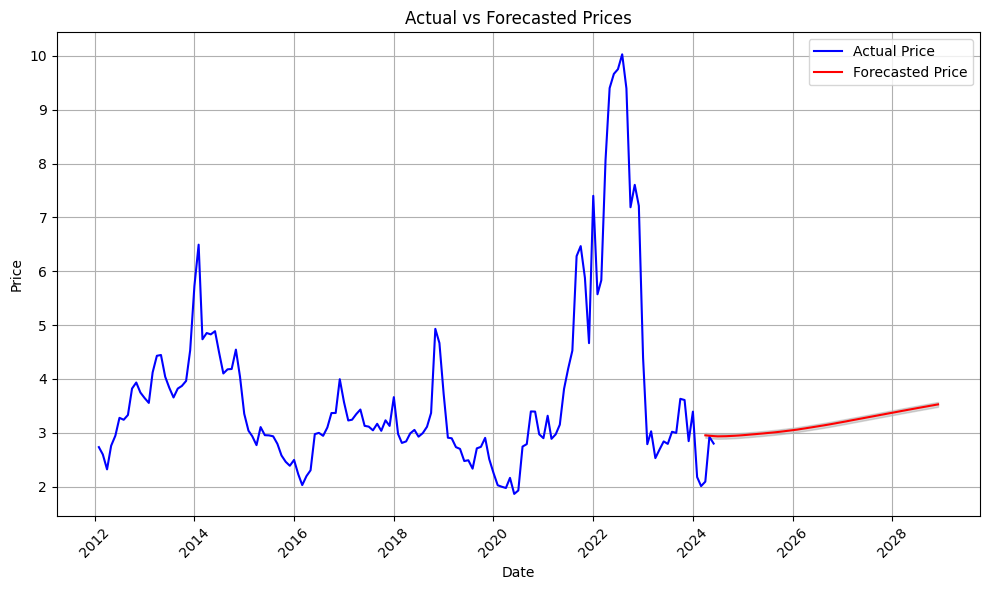

In [44]:
import matplotlib.pyplot as plt

# Plotting the trends of the dataset and the forecasted values
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df['Date'], df['Price'], label='Actual Price', color='blue')

# Plot forecasted values
plt.plot(predictions_df['Date'], predictions_df['Forecasted Price'], label='Forecasted Price', color='red')

# Plot confidence intervals
plt.fill_between(predictions_df['Date'], predictions_df['Lower Bound'], predictions_df['Upper Bound'], color='gray', alpha=0.3)

plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


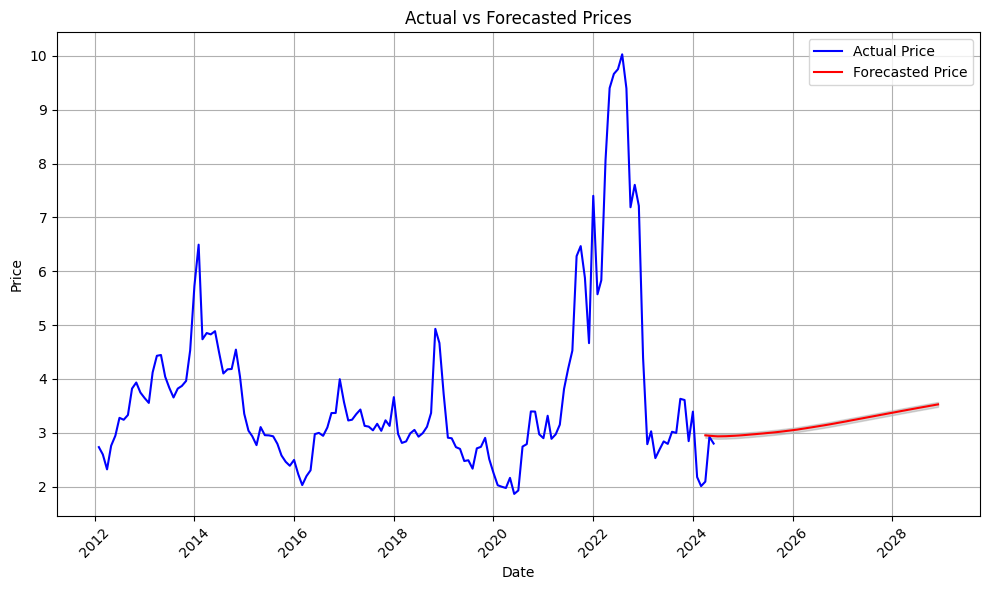

In [46]:
import matplotlib.pyplot as plt

# Plotting the trends of the dataset and the forecasted values
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df['Date'], df['Price'], label='Actual Price', color='blue')

# Plot forecasted values
plt.plot(predictions_df['Date'], predictions_df['Forecasted Price'], label='Forecasted Price', color='red')

# Plot confidence intervals
plt.fill_between(predictions_df['Date'], predictions_df['Lower Bound'], predictions_df['Upper Bound'], color='gray', alpha=0.3)

plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


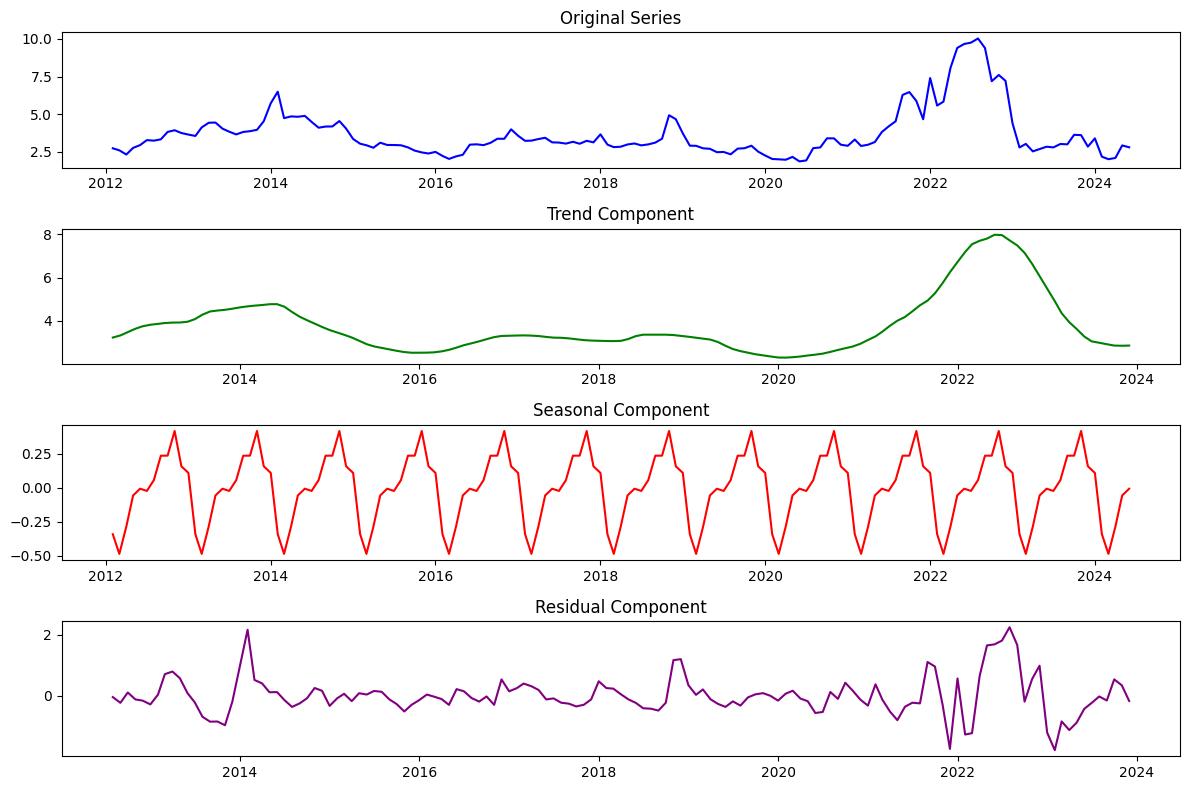

In [47]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the actual prices
decomposition = seasonal_decompose(df['Price'], model='additive', period=12)  # Assuming a seasonal period of 12 months (1 year)

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df['Date'], df['Price'], label='Original', color='blue')
plt.title('Original Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df['Date'], decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(df['Date'], decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(df['Date'], decomposition.resid, label='Residual', color='purple')
plt.title('Residual Component')

plt.tight_layout()
plt.show()